In [1]:
%matplotlib inline 
import xarray as xray 
import os
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
direc = '/raid/gergel/rasm'
filename = 'output_fullenergy_4year.nc'
ds = xray.open_dataset(os.path.join(direc, filename))

In [3]:
u = ds.groupby('time.month').mean('time')
# april = u.sel(month=4).groupby('time.day').mean('time')

saving figure to '/raid9/gergel/rasm/plots/summer_soil_moisture.png'


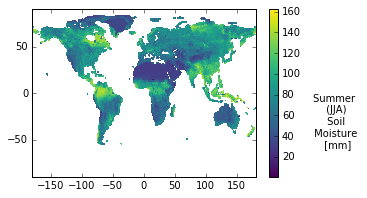

In [4]:
lp = 35

f = plt.figure(figsize=(5,3))
summer_sm = (u['OUT_SOIL_MOIST'].sel(month=6) + u['OUT_SOIL_MOIST'].sel(month=7) + 
             u['OUT_SOIL_MOIST'].sel(month=8)) / 3.0
img = summer_sm.sel(nlayer=0).plot(add_colorbar=False, add_labels=False)
cbar = plt.colorbar(img)
cbar.set_label('Summer \n (JJA) \n Soil \n Moisture \n [mm]', rotation='horizontal', labelpad=lp)

## save plot
direc = '/raid9/gergel/rasm/plots'
if not os.path.exists(direc):
    os.makedirs(direc) ## if directory doesn't exist, create it
plotname = 'summer_soil_moisture.png'
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath, bbox_inches='tight')

saving figure to '/raid9/gergel/rasm/plots/april_1_swe.png'


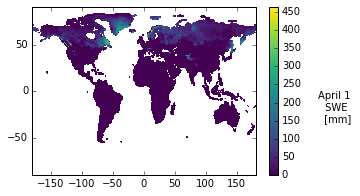

In [5]:
f = plt.figure(figsize=(5,3))
swe = ds['OUT_SWE'].loc[dict(time=slice('2006-04-01', '2006-04-01'))]
img = swe.plot(add_colorbar=False, add_labels=False)
cbar = plt.colorbar(img)
cbar.set_label('April 1 \n SWE \n [mm]', rotation='horizontal', labelpad=lp)

## save plot
direc = '/raid9/gergel/rasm/plots'
if not os.path.exists(direc):
    os.makedirs(direc) ## if directory doesn't exist, create it
plotname = 'april_1_swe.png'
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath, bbox_inches='tight')

saving figure to '/raid9/gergel/rasm/plots/mean_annual_evap.png'


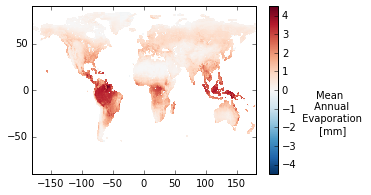

In [6]:
f = plt.figure(figsize=(5,3))
img = ds['OUT_EVAP'].mean('time').plot(add_colorbar=False, add_labels=False)
# img = summer_sm.sel(nlayer=0).plot(add_colorbar=False, add_labels=False)
cbar = plt.colorbar(img)
cbar.set_label('Mean \n Annual \n Evaporation \n [mm]', rotation='horizontal', labelpad=lp)

## save plot
direc = '/raid9/gergel/rasm/plots'
if not os.path.exists(direc):
    os.makedirs(direc) ## if directory doesn't exist, create it
plotname = 'mean_annual_evap.png'
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath, bbox_inches='tight')

saving figure to '/raid9/gergel/rasm/plots/mean_annual_runoff.png'


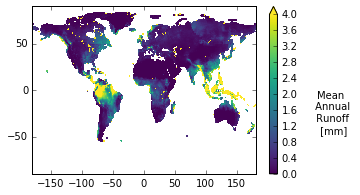

In [23]:
f = plt.figure(figsize=(5,3))
img = (ds['OUT_RUNOFF'].mean('time') + ds['OUT_BASEFLOW'].mean('time')).plot(add_colorbar=False, 
                                                                             add_labels=False, 
                                                                             robust=True, 
                                                                             vmax=4)
# img = summer_sm.sel(nlayer=0).plot(add_colorbar=False, add_labels=False)
cbar = plt.colorbar(img, extend='max')
cbar.set_label('Mean \n Annual \n Runoff \n [mm]', rotation='horizontal', labelpad=lp)

## save plot
direc = '/raid9/gergel/rasm/plots'
if not os.path.exists(direc):
    os.makedirs(direc) ## if directory doesn't exist, create it
plotname = 'mean_annual_runoff.png'
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath, bbox_inches='tight')

saving figure to '/raid9/gergel/rasm/plots/snowfall.png'


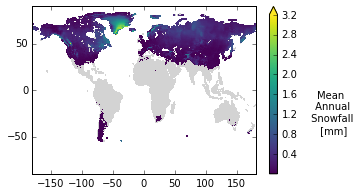

In [24]:
f = plt.figure(figsize=(5,3))

mean_snowfall = ds['OUT_SNOWF'].mean('time')

swe_cmap = plt.get_cmap('viridis')
swe_cmap.set_under(color='LightGrey')

img = mean_snowfall.plot(cmap=swe_cmap, vmin = 0.00001, add_colorbar=False, add_labels=False)

cbar = plt.colorbar(img, extend='max')
cbar.set_label('Mean \n Annual \n Snowfall \n [mm]', rotation='horizontal', labelpad=lp)

## save plot
direc = '/raid9/gergel/rasm/plots'
if not os.path.exists(direc):
    os.makedirs(direc) ## if directory doesn't exist, create it
plotname = 'snowfall.png'
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath, bbox_inches='tight')

saving figure to '/raid9/gergel/rasm/plots/soil_temp.png'


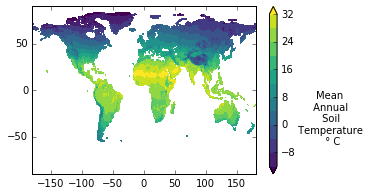

In [9]:
f = plt.figure(figsize=(5,3))
'''
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.Mollweide())'''

img = ds['OUT_SOIL_TEMP'].mean('time').sel(nlayer=0).plot(add_colorbar=False, add_labels=False, vmin=-10,vmax=30,
                                                          levels=11)

cbar = plt.colorbar(img)

cbar.set_label('Mean \n Annual \n Soil \n Temperature \n \xb0 C', rotation='horizontal', labelpad=lp)

'''ax.set_global()
ax.coastlines()'''

## save plot
direc = '/raid9/gergel/rasm/plots'
if not os.path.exists(direc):
    os.makedirs(direc) ## if directory doesn't exist, create it
plotname = 'soil_temp.png'
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath, bbox_inches='tight')